# Wine Quality Exploratory Data Analysis and Hypothesis Testing

Red and white wines generally have different flavor characteristics. A portion of these differences could be a result of subjective human interpretation and preferences - a wine might taste sweeter or more acidic to a person depending on his or her palette sensitivity. However, some of the differences are likely a result of the wine's objective chemical profile.

The Wine Quality dataset includes 11 physicochemical properties measured for red and white wine samples. This analysis will compare the distribution and mean value differences between red and white wine via these properties to determine if the differences observed between wine type are statistically significant.

## Data Source

Wine Quality.

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
              [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
              [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# Import dataset and remove quality variable
red = pd.read_csv('./Data/winequality-red.csv', sep=';')
red.drop('quality', axis=1, inplace=True)

white = pd.read_csv('./Data/winequality-white.csv', sep=';')
white.drop('quality', axis=1, inplace=True)

In [3]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [4]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


## Part I: Exploratory Data Analysis

In [5]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
dtypes: float64(11)
memory usage: 137.5 KB


In [6]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [7]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 11 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
dtypes: float64(11)
memory usage: 421.0 KB


In [8]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


In [9]:
mean_diff = red.mean() - white.mean()
mean_diff

fixed acidity            1.464850
volatile acidity         0.249579
citric acid             -0.063216
residual sugar          -3.852609
chlorides                0.041694
free sulfur dioxide    -19.433163
total sulfur dioxide   -91.892865
density                  0.002719
pH                       0.122847
sulphates                0.168302
alcohol                 -0.091284
dtype: float64

### Summary Statistics

A quick look at a few summary statistics - including a comparison of the means that will be tested - indicates some potential physiochemical differences between the types of wine. There also appear to be some large maximum values (compared to the median and 75th percentile figures) for certain variables that could impact means - since the hypothesis test will rely on mean values (which are sensitive to outliers), extreme outliers could impact the test. Graphical exploratory data analysis will enable a closer look at variable distributions and outliers.

### Data Visualizations

Data visualizations are a key part of exploratory data analysis. They can provide insights for relationships in the data or identify potential issues. The hypothesis tests will compare each variable's mean and distribution by type of wine, and seeing the relationships will help interpret the results later.

First, box plots detect the aforementioned extreme outliers for removal. Next, a correlation matrix shows the relationships between variables within each dataset in case any are redundant. Finally, the red and white wine distributions (plotted side-by-side) show any differences between specific variable distributions by wine type.

#### Red Wine Data Cleaning and Visualizations

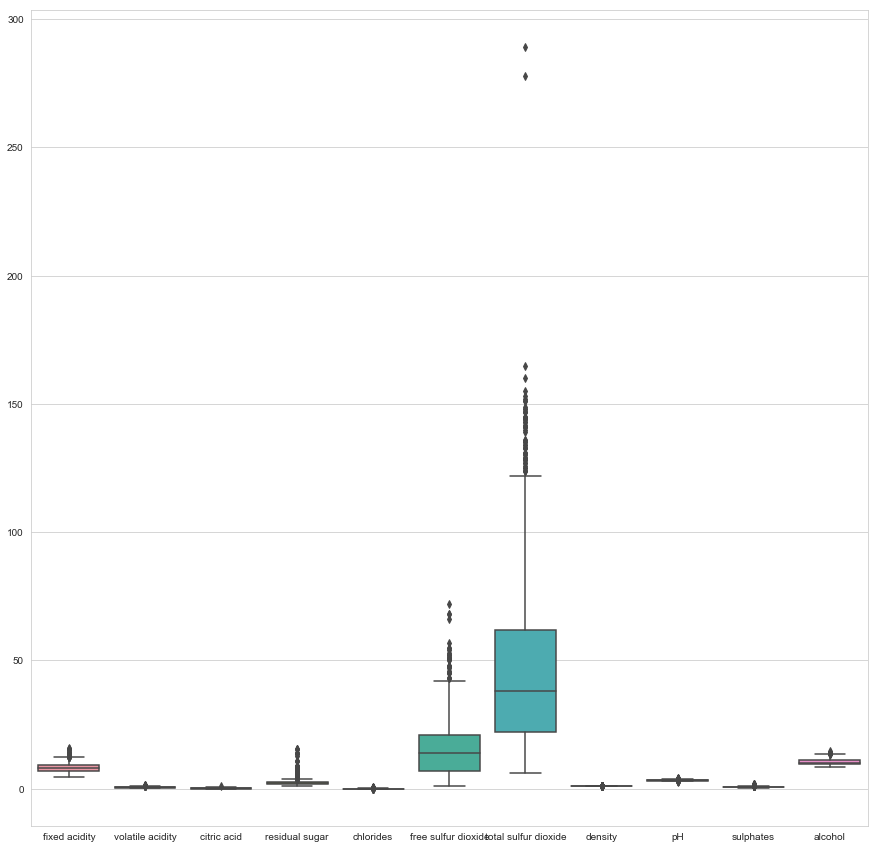

In [10]:
# Red wine box plots
plt.figure(figsize=(15, 15))
sns.boxplot(data=red);

The box plots indicate two suspicious measurements in the `total sulfur dioxide` variable. Outliers are innocent until proven guilty, but given these are over 100 units more than the next value (also an outlier) and the difference between the minimum and Q3 values have a spread less than that amount (56 units), the measurements seem erroneous.

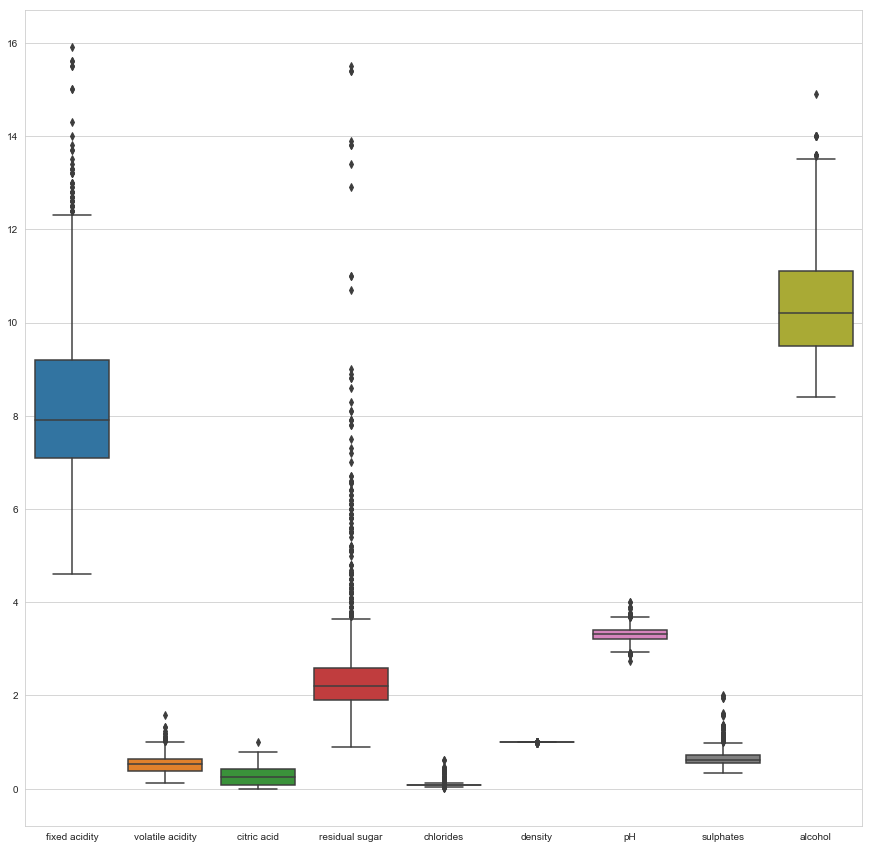

In [11]:
red_clean = red[red['total sulfur dioxide'] < 200]
plt.figure(figsize=(15, 15))
cols = [col for col in red_clean.columns if col not in ['free sulfur dioxide', 'total sulfur dioxide']]
sns.boxplot(data=red_clean[cols]);

Most of the other variables don't display as much variability as the sulfur dioxide-related ones. One interesting observation is the sheer number of outliers in the `residual sugar` plot. It will be interesting to see if the white wines show a similar pattern.

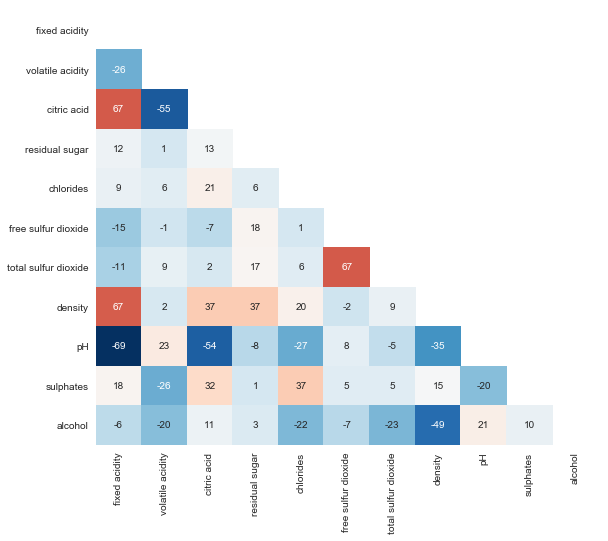

In [12]:
# Red wine correlation matrix
rcorrelations = red_clean.corr()

# Adjust figure size
plt.figure(figsize=(9, 8))

# Triangle mask
mask = np.zeros_like(rcorrelations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot heatmap of correlations
sns.heatmap(rcorrelations*100, annot=True, fmt='.0f', mask=mask, cbar=False, cmap='RdBu_r');

The correlation matrix shows some basic chemical relationships (not surprising) and some interesting relationships between certain variables.

Not surprising:
- `pH` is negatively correlated with `fixed acidity` - low pH values indicate an acidic solution
- `fixed acidity` and `citric acid` are positively correlated, the `citric acid` in the wine likely accounts for some of the `fixed acidity` measure
- the two sulfur dioxide variables are positively correlated

Interesting:
- Density, sugar, and alcohol content are known to be related in alcoholic beverages (lower alcohol levels indicate that more sugar is still present, which makes for a denser liquid), but those correlations aren't strong
- `volatile acidity` and `fixed acidity` are negatively correlated - there may be a common 'total acidity' range for wines and where the higher the volatile portion, the lower the fixed portion is. A better understanding about wine and the chemical properties is warranted

The hypothesis tests below compare wines by type, so a deep dive into how each wine type's individual properties relate to one another isn't necessary. That said, strong correlations can guide decisions around which variables to include in the test and which ones are redundant.

#### White Wine Data Cleaning and Individual Visualizations

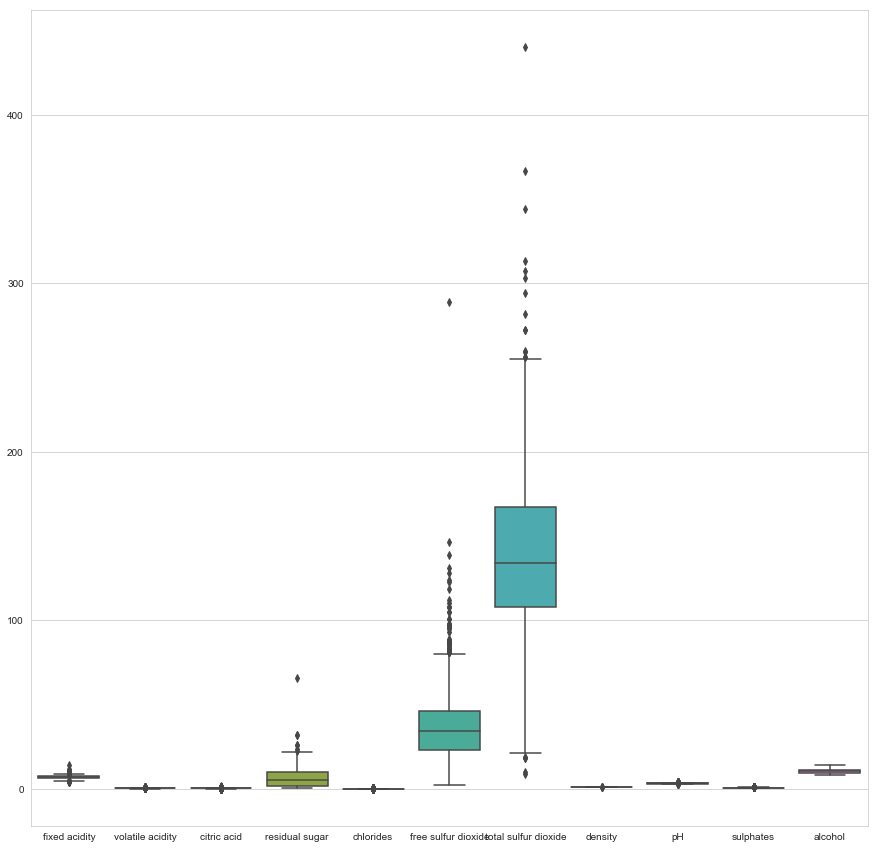

In [13]:
# White wine box plots
plt.figure(figsize=(15, 15))
sns.boxplot(data=white);

As with the red wine set, the white wine data need a quick cleaning adjustment to remove the single max value outliers for `residual sugar`, `free sulfur dioxide`, and `total sulfur dioxide`.

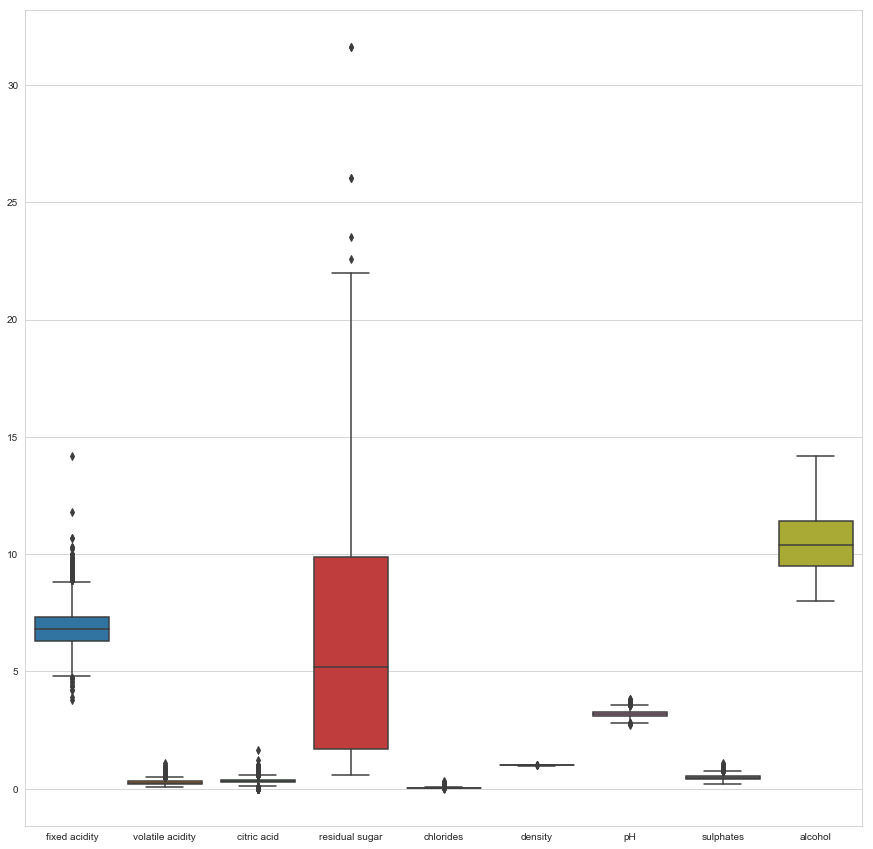

In [14]:
# White wine box plots
white_clean = white[(white['residual sugar'] < 50) & (white['free sulfur dioxide'] < 250) & (white['total sulfur dioxide'] < 400)]
plt.figure(figsize=(15, 15))
cols = [col for col in white_clean.columns if col not in ['free sulfur dioxide', 'total sulfur dioxide']]
sns.boxplot(data=white_clean[cols]);

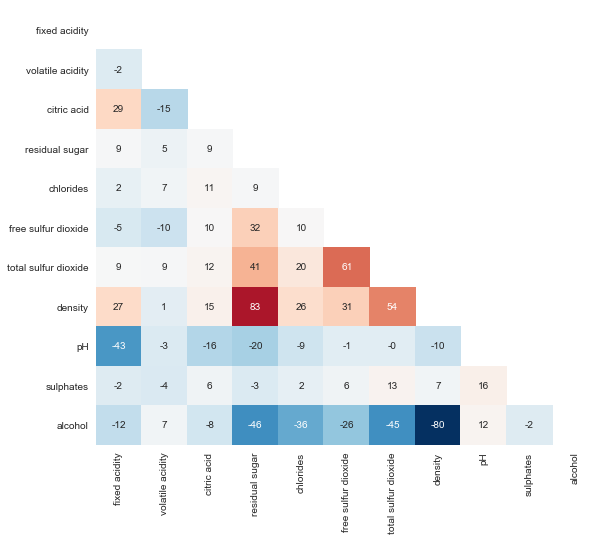

In [50]:
# White Wine Correlation Map
correlations_w = white_clean.corr()

# Adjust figure size
plt.figure(figsize=(9, 8))

# Triangle mask
mask_w = np.zeros_like(correlations_w, dtype=np.bool)
mask_w[np.triu_indices_from(mask_w)] = True

# Plot heatmap of correlations
sns.heatmap(correlations_w*100, annot=True, fmt='.0f', mask=mask_w, cbar=False, cmap='RdBu_r');

No major surprises in the white wine correlation matrix. In fact, it clearly shows the `alcohol`-`residual sugar`-`density` relationship noted in the red wine section above.

#### Distributions by Type of Wine

The pairplot below has a lot going on, but the diagonal plots that show segmented KDE plots highlight some key information for the hypothesis test. There are several variables where the distributions appear different (the hypothesis test will determine if those differences are statistically significant), such as `volatile acidity`, `chlorides`, `free sulfur dioxide`, and `total sulfur dioxide`. Others overlap heavily, like `fixed acidity`, `sulphates`, and `alcohol`. The distributions for `citric acid` and `residual sugar` overlap, but it would be more interesting to compare the spreads than the means.

Since the pairplot is difficult to read, see below for larger versions of the distributions by type of wine for each variable.

In [15]:
# Concatenate dataframes and add type column for pairplot
wine = pd.concat([red_clean, white_clean], ignore_index=True)
wine['type'] = ['red'] * red_clean.shape[0] + ['white'] * white_clean.shape[0]

<Figure size 1080x1440 with 0 Axes>

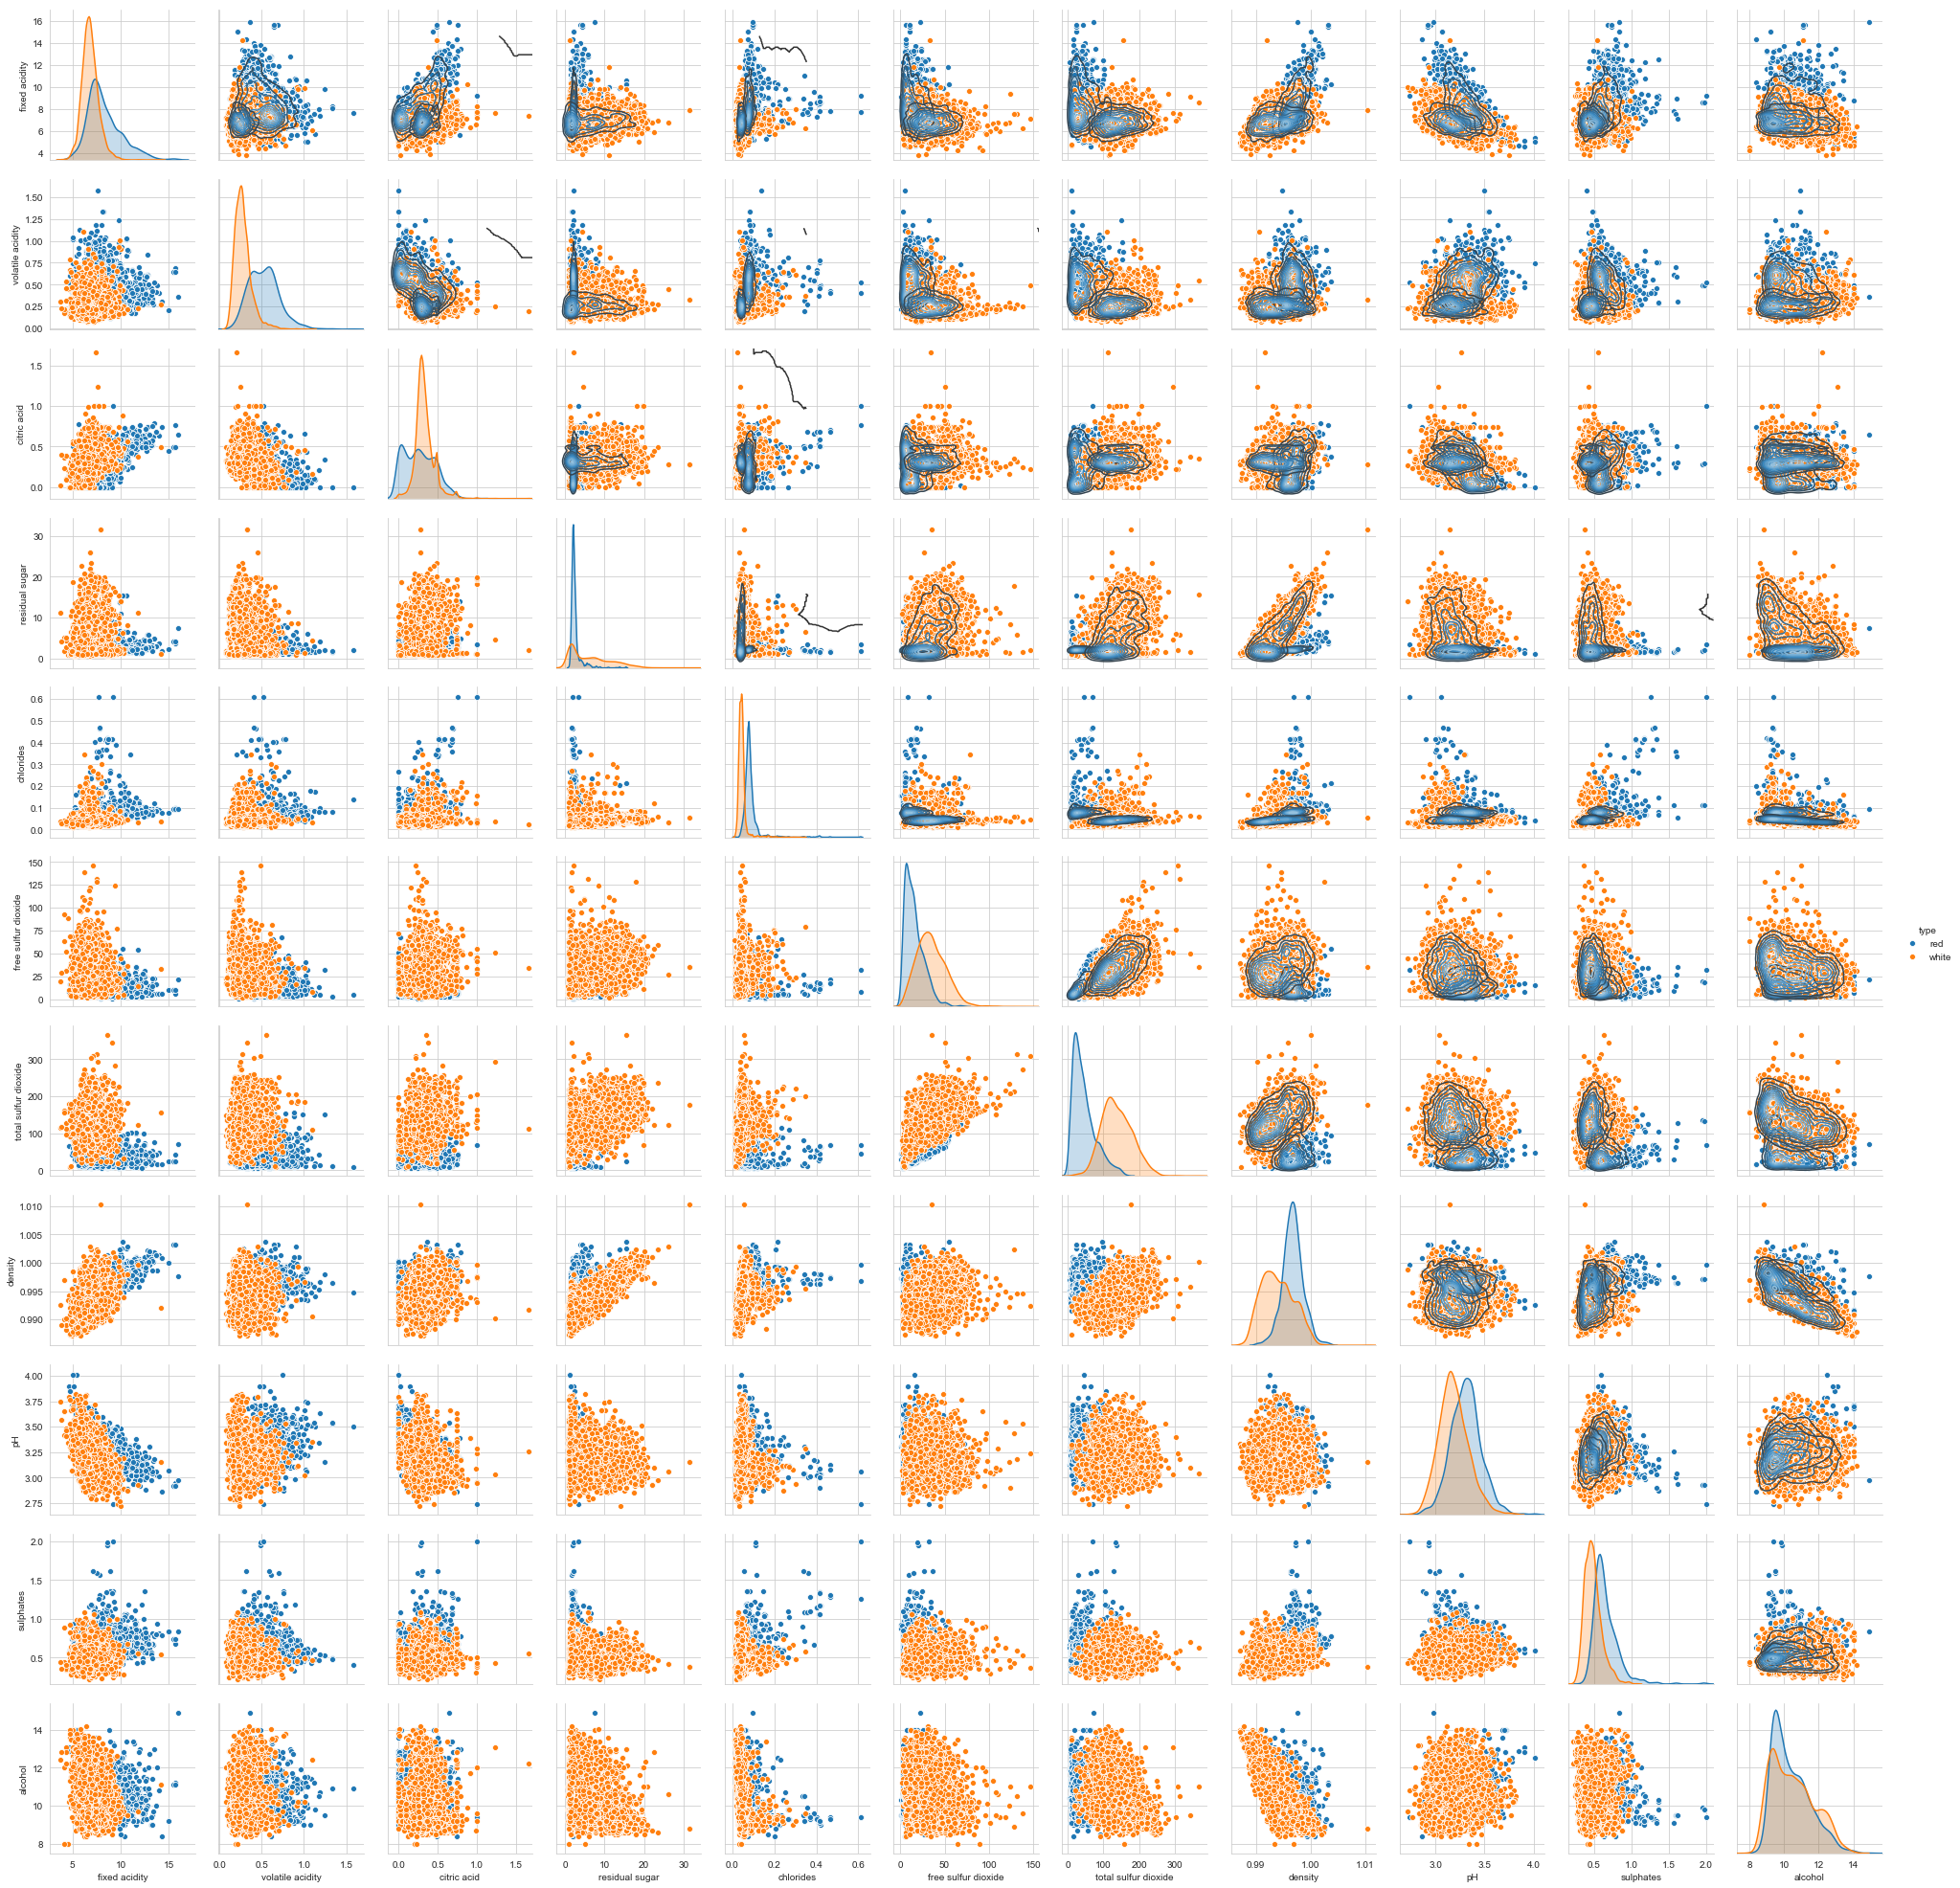

In [69]:
# All wines scatter and KDE matrix
plt.figure(figsize=(15, 20))
sns.pairplot(wine, hue='type', diag_kind='kde').map_upper(sns.kdeplot, cmap='Blues_d');

<Figure size 432x288 with 0 Axes>

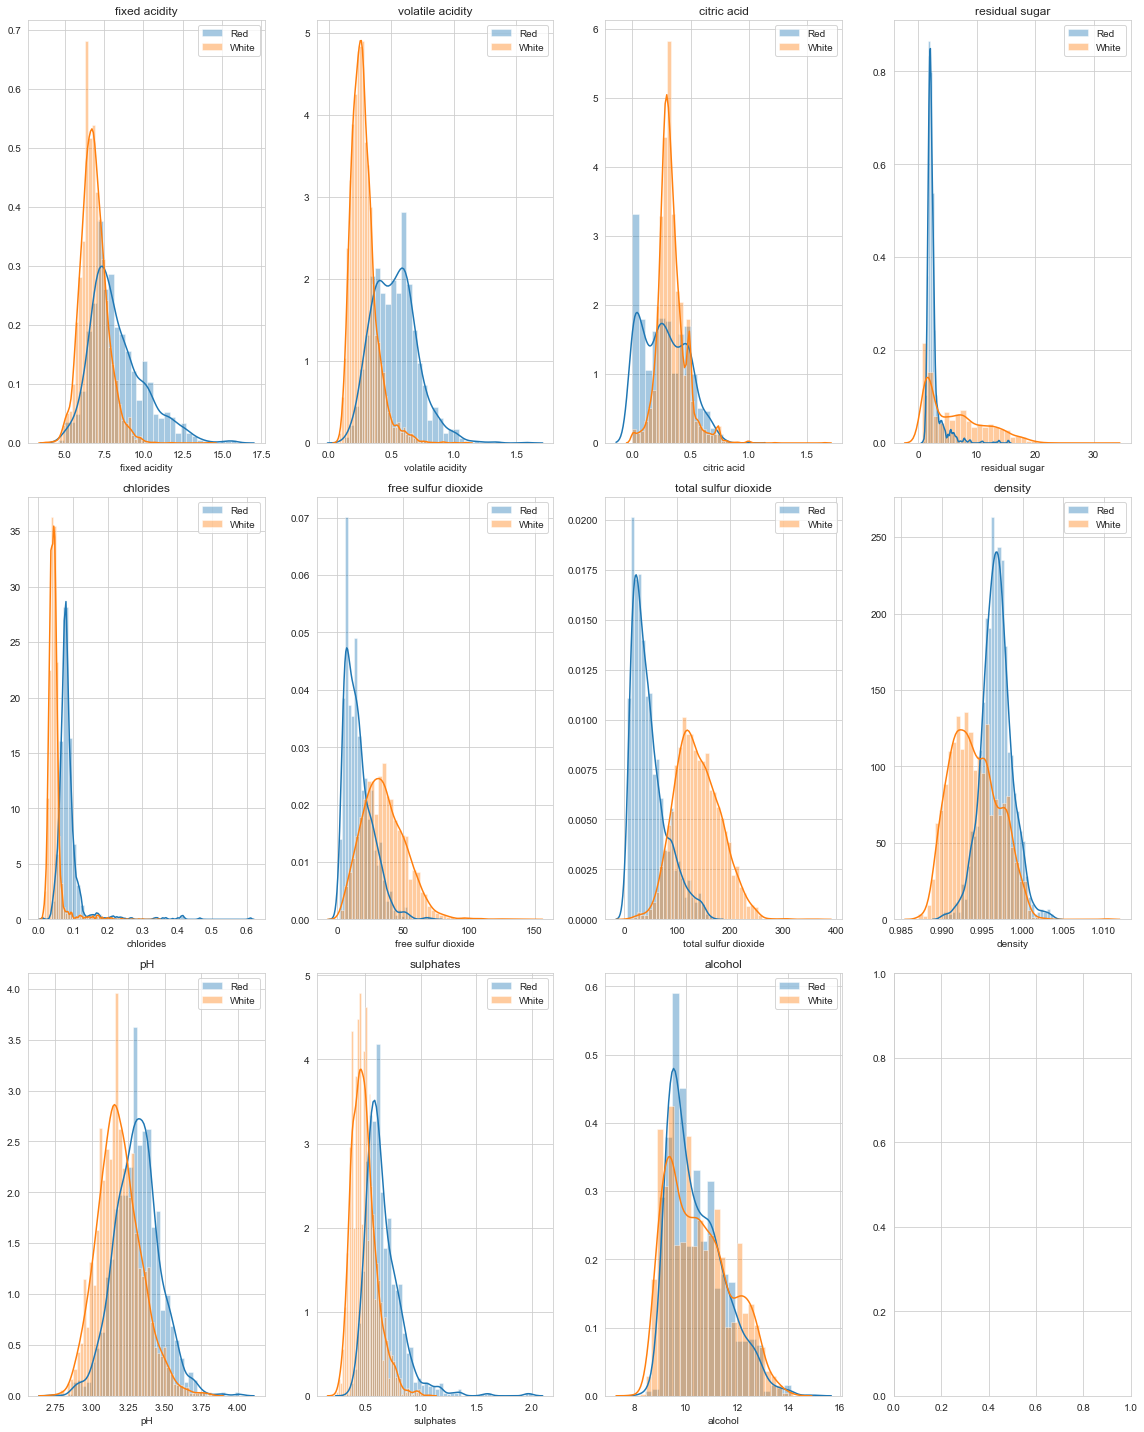

In [16]:
plt.figure();
plt.subplots(3, 4, figsize=((16, 20)));

for i, col in enumerate(red_clean.columns):
    plt.subplot(3, 4, i + 1)
    sns.distplot(red_clean[col], label="Red");
    sns.distplot(white_clean[col], label="White");
    plt.title(col);
    plt.legend();

plt.tight_layout();

#### Empirical Cumulative Distribution Function

The distplots above are one way to see a side-by-side comparison of each variable's distribution by type of wine. The other it to plot the empirical cumulative distribution for each variable.

In [43]:
# Helper function to calculate the empirical cumulative distribution function

def ecdf(data):
    """
    Compute ECDF for a one-dimensional array of measurements.
    :param data: one-dimensional array (or array-like object) of measurements
    :return: tuple of x, y arrays (of same length as `data`)
        `x` holds sorted measurements from `data`
        `y` holds equally-spaced values from 0 to 1
    """
    # Number of data points
    n = len(data)

    # x-data for the ECDF
    x = np.sort(data)

    # y-data for the ECDF
    y = np.arange(1, n + 1) / n

    return x, y

<Figure size 432x288 with 0 Axes>

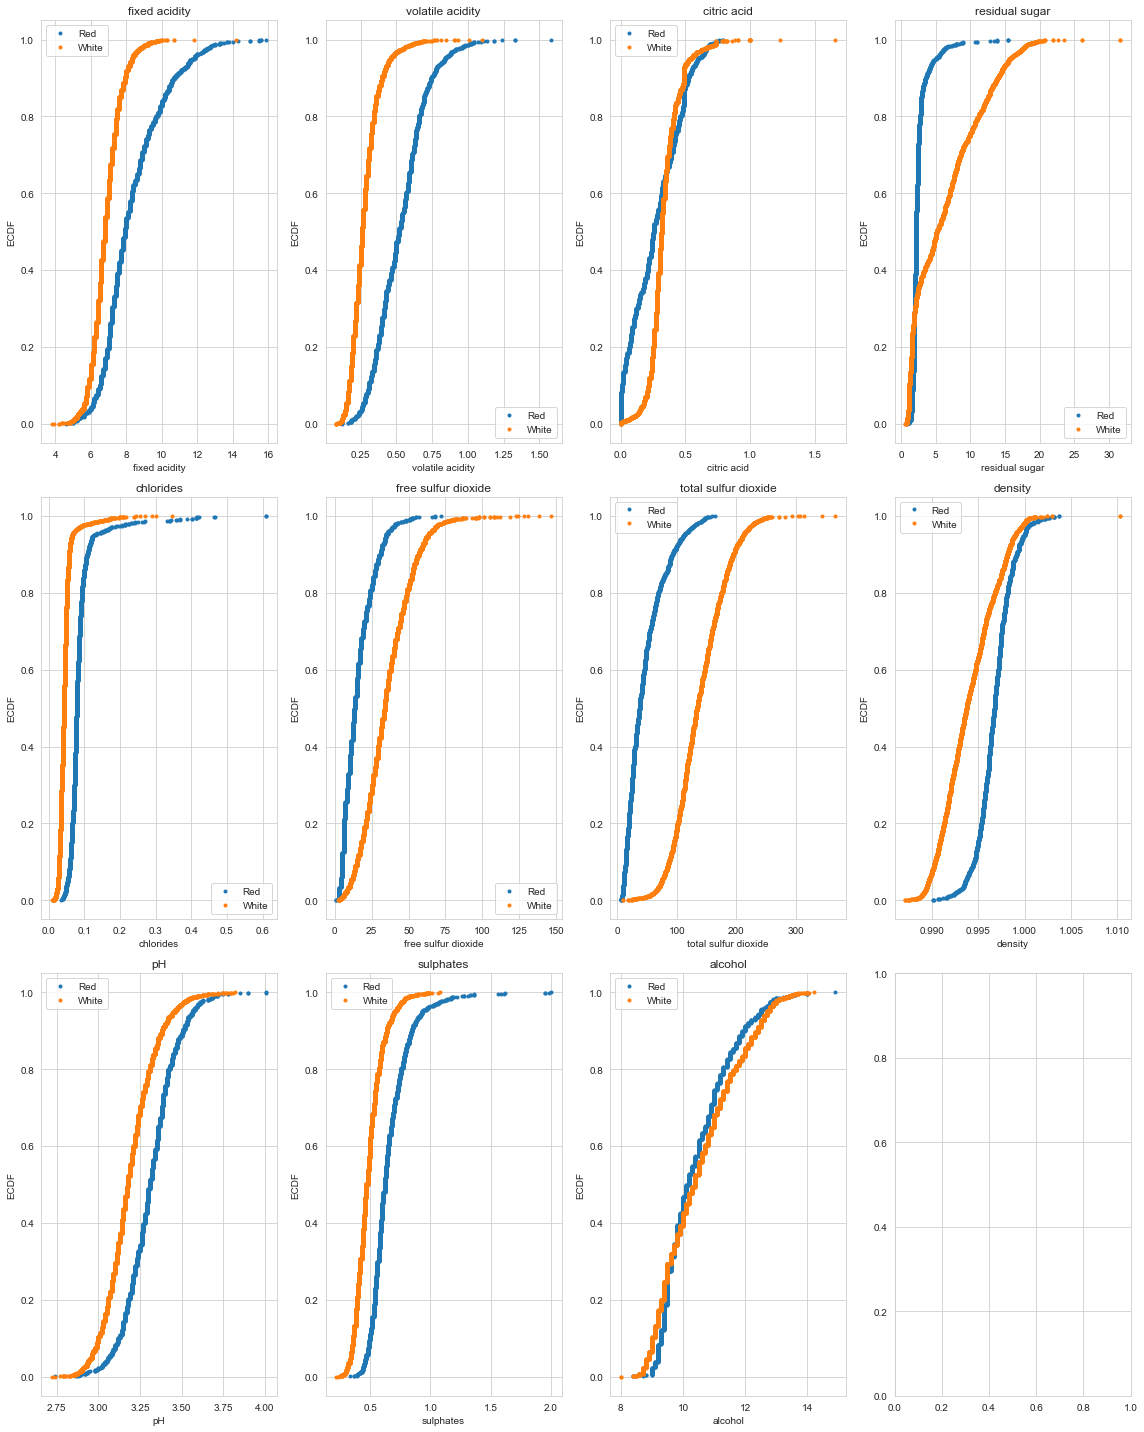

In [18]:
plt.figure();
plt.subplots(3, 4, figsize=((16, 20)));

for i, col in enumerate(red_clean.columns):
    plt.subplot(3, 4, i + 1)
    
    x_r, y_r = ecdf(red_clean[col])
    plt.plot(x_r, y_r, marker='.', linestyle='none', label='Red');

    x_w, y_w = ecdf(white_clean[col])
    plt.plot(x_w, y_w, marker='.', linestyle='none', label='White');
    
    plt.title(col);
    plt.xlabel(col);
    plt.ylabel('ECDF')
    plt.legend();

plt.tight_layout();

## Part II: Hypothesis Testing

### 1) Red and White Wine Properties Have the Same Distributions

The first hypothesis test assumes the red and white trends seen in each wine property variable are identically distributed. It uses a permutation sampling method to run **null hypothesis significance testing (NHST)**.

The tests are performed for each physiochemical properties in the Wine Quality dataset to compare the distributions of red versus white wines.

- **Null Hypothesis ($H_0$)**: $\text{Distribution of property}_{\text{red}} = \text{Distribution of property}_{\text{white}}$
- **Alternative Hypothesis ($H_a$)**: $\mu_{\text{red}} \ne \mu_{\text{white}}$
- **$\alpha$**: 0.05
- **Test Statistic**: mean

The plots above show visual evidence that the distributions by type of wine are different, but the hypothesis test will calculate whether those differences are statistically significant, and by what degree. Steps of the analysis:

1. Concatenate the measurements for a given physiochemical property for both red and white wines
2. Take repeated permutations of the combined data, split it into new red and white segments, and calculate the difference between the new means (the test statistic)
3. Calculate the $p$-value (the probability of observing a test statistic equally or more extreme than the empirically-observed statistic, assuming that the null hypothesis is true)
4. Compare the $p$-value to the $\alpha$ threshold to determine if the difference in the observed means for a given property is statistically significant, and therefore is strong enough evidence to reject the null hypothesis

In [19]:
# Helper function to create one permutation sample

def permutation_sample(data_1, data_2):
    """
    Generate a permutation sample from two data sets
    
    :param data_1: 1D array-like, measurements for group 1
    :param data_2: 1D array-like, measurements for group 2
    :return: tuple of two arrays, or same length as input `data_1` and `data_2`
    arrays, respectively
    """

    # Concatenate the data sets
    data = np.concatenate((data_1, data_2))

    # Permute the concatenated array:
    perm_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = perm_data[:len(data_1)]
    perm_sample_2 = perm_data[len(data_1):]

    return perm_sample_1, perm_sample_2

In [20]:
# Helper function to generate permutation replicates

def gen_perm_reps(data_1, data_2, func, size=1):
    """
    Generate multiple permutation replicates from two data sets
    
    :param data_1: 1D array-like, measurements for group 1
    :param data_2: 1D array-like, measurements for group 2
    :param func: function to calculate the permutation replicate
    :param size: number of replicates to generate
    :return: an array of size `size` with permutation sample replicates
    """

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [21]:
# Helper function to calculate the difference of means

def diff_of_means(data_1, data_2):
    """
    Computes the difference in means between two arrays
    :param data_1: 1D array-like, measurements for group 1
    :param data_2: 1D array-like, measurements for group 2
    :return: the difference between the mean of `data_1` and the mean of `data_2`
    """

    diff = np.mean(data_1) - np.mean(data_2)
    return diff

------------------------------
VARIABLE: FIXED ACIDITY
Number of Permutations: 100,000
Red Wines Empirical Mean: 8.32
White Wines Empirical Mean: 6.85
Empirical Mean Diff (abs val): 1.47
p-value: 0.00000


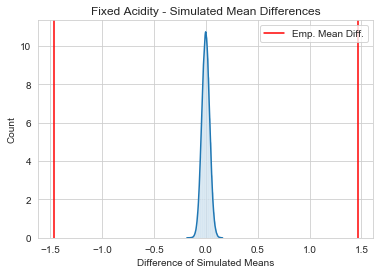


------------------------------
VARIABLE: VOLATILE ACIDITY
Number of Permutations: 100,000
Red Wines Empirical Mean: 0.53
White Wines Empirical Mean: 0.28
Empirical Mean Diff (abs val): 0.25
p-value: 0.00000


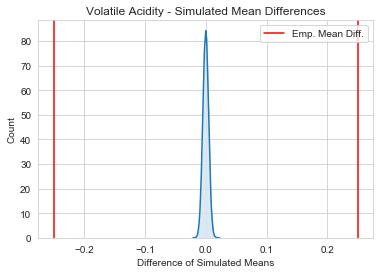


------------------------------
VARIABLE: CITRIC ACID
Number of Permutations: 100,000
Red Wines Empirical Mean: 0.27
White Wines Empirical Mean: 0.33
Empirical Mean Diff (abs val): 0.06
p-value: 0.00000


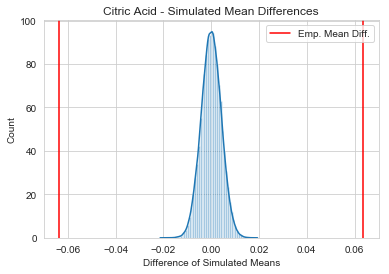


------------------------------
VARIABLE: RESIDUAL SUGAR
Number of Permutations: 100,000
Red Wines Empirical Mean: 2.53
White Wines Empirical Mean: 6.38
Empirical Mean Diff (abs val): 3.85
p-value: 0.00000


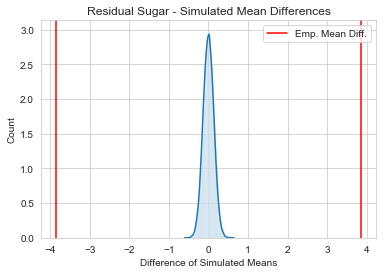


------------------------------
VARIABLE: CHLORIDES
Number of Permutations: 100,000
Red Wines Empirical Mean: 0.09
White Wines Empirical Mean: 0.05
Empirical Mean Diff (abs val): 0.04
p-value: 0.00000


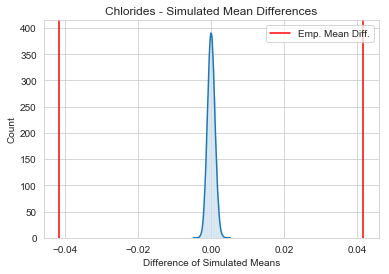


------------------------------
VARIABLE: FREE SULFUR DIOXIDE
Number of Permutations: 100,000
Red Wines Empirical Mean: 15.85
White Wines Empirical Mean: 35.26
Empirical Mean Diff (abs val): 19.41
p-value: 0.00000


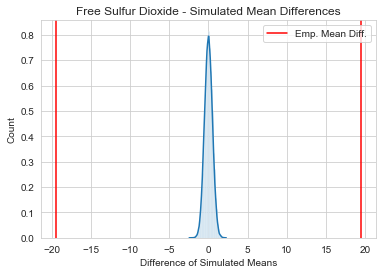


------------------------------
VARIABLE: TOTAL SULFUR DIOXIDE
Number of Permutations: 100,000
Red Wines Empirical Mean: 46.17
White Wines Empirical Mean: 138.29
Empirical Mean Diff (abs val): 92.12
p-value: 0.00000


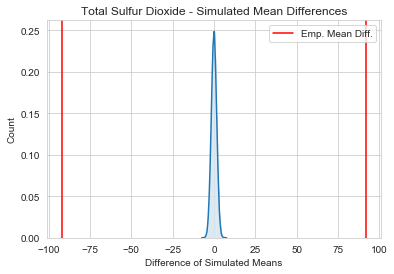


------------------------------
VARIABLE: DENSITY
Number of Permutations: 100,000
Red Wines Empirical Mean: 1.00
White Wines Empirical Mean: 0.99
Empirical Mean Diff (abs val): 0.00
p-value: 0.00000


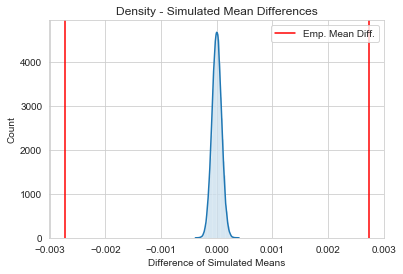


------------------------------
VARIABLE: PH
Number of Permutations: 100,000
Red Wines Empirical Mean: 3.31
White Wines Empirical Mean: 3.19
Empirical Mean Diff (abs val): 0.12
p-value: 0.00000


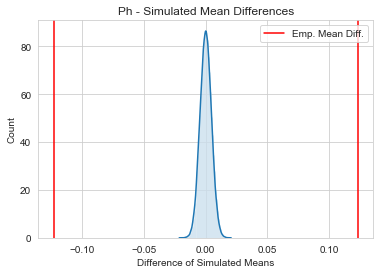


------------------------------
VARIABLE: SULPHATES
Number of Permutations: 100,000
Red Wines Empirical Mean: 0.66
White Wines Empirical Mean: 0.49
Empirical Mean Diff (abs val): 0.17
p-value: 0.00000


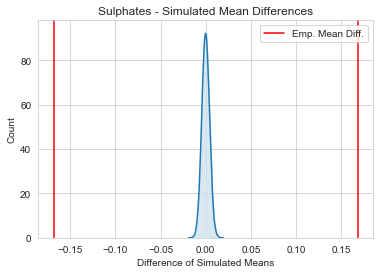


------------------------------
VARIABLE: ALCOHOL
Number of Permutations: 100,000
Red Wines Empirical Mean: 10.42
White Wines Empirical Mean: 10.51
Empirical Mean Diff (abs val): 0.09
p-value: 0.00658


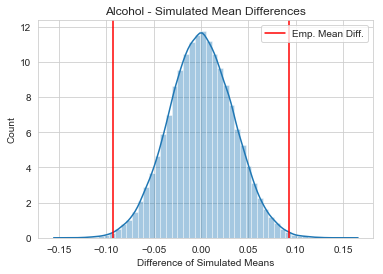


------------------------------


In [41]:
# Perform permutations and calculate p-values

size = 100000

for col in red_clean.columns:
    data_r = red_clean[col]
    data_w = white_clean[col]

    # Calculate empirical difference of means and generate permutations
    empirical_means_diff = abs(diff_of_means(data_r, data_w))
    perm_reps = gen_perm_reps(data_r, data_w, diff_of_means, size)

    # Compute p-value (two-tailed)
    p = np.sum(abs(perm_reps) >= empirical_means_diff) / len(perm_reps)

    # Format and print results
    print('-' * 30)
    print('VARIABLE: {}'.format(col.upper()))
    print('Number of Permutations: {0:,}'.format(size))
    print('Red Wines Empirical Mean: {0:.2f}'.format(np.mean(data_r)))
    print('White Wines Empirical Mean: {0:.2f}'.format(np.mean(data_w)))
    print('Empirical Mean Diff (abs val): {0:.2f}'.format(empirical_means_diff))
    print('p-value: {0:.5f}'.format(p))

    # Plot results
    plt.figure()
    sns.distplot(perm_reps);
    plt.xlabel('Difference of Simulated Means');
    plt.ylabel('Count');
    plt.axvline(x=empirical_means_diff, color='red', label='Emp. Mean Diff.');
    plt.axvline(x=-empirical_means_diff, color='red');
    plt.title(col.title() + ' - Simulated Mean Differences');
    plt.legend();
    plt.show()
    print()

print('-' * 30)

#### Conclusions

Even running 100,000 permutations, the difference in the empirical means between red and white wines for almost all variables were too extreme to register any simulated mean differences of an equal or greater value. This is why the $p$-values for every variable except `alcohol` were $0$ (in reality, the $p$-values weren't actually zero, but extremely small and well below the $\alpha$ threshold of 0.05). These outcomes and the `alcohol` $p$-value of ~$0.007$ provides strong evidence to reject the null hypothesis that red and white wine physiochemical properties have the same distributions, and that the differences between the distributions are statistically significant.

### 2) Red and White Wine Properties Have the Same Means

The next hypothesis test assumes that the distributions are different, but the means for a given property of red and white wine are the same.  It shifts the means of the red and white properties to be equal, then uses a bootstrap sampling method on the shifted distributions to draw bootstrap replicates. The difference between the bootstrap replicates (mean) are then compared to the empirical mean difference to determine the likelihood of observing such values.

The tests are performed for each physiochemical properties in the Wine Quality dataset.

- **Null Hypothesis ($H_0$)**: $\mu_{\text{red}} = \mu_{\text{white}}$
- **Alternative Hypothesis ($H_a$)**: $\mu_{\text{red}} \ne \mu_{\text{white}}$
- **$\alpha$**: 0.05
- **Test Statistic**: mean

Steps of the analysis:

1. Combine the measurements for a given physiochemical property for both red and white wines and calculate the mean
2. Shift both the red and white distributions so their new mean equals that of the combined data
3. Generate bootstrap replicates by drawing bootstrap samples out of the shifted arrays and computing the difference in means
4. Calculate the $p$-value (the probability of observing a test statistic that's equal or more extreme than the empirically-observed statistic, assuming the null hypothesis is true)
5. Compare the $p$-value to the $\alpha$ threshold to determine if the difference in the observed means for a given property is statistically significant, and therefore is strong enough evidence to reject the null hypothesis

In [28]:
# Helper function to calculate one bootstrap replicate from data

def bootstrap_rep(data, func):
    """
    Generates one bootstrap replicate based on `func` from a data set
    
    :param data: 1D array-like data set
    :param func: a function that takes a 1D array-like data set and computes
        the replicate, such as mean
    :return: number, the one replicate based on samples from `data`
    """
    
    return func(np.random.choice(data, size=len(data)))

In [29]:
# Helper function to generate many bootstrap replicates from data

def gen_bootstrap_reps(data, func, size=1):
    """
    Generates `size` number of bootstrap replicates from a data set
    
    :param data: 1D array-like data set
    :param func: a function that takes a 1D array-like data set and computes
        the replicate, such as mean
    :param size: the number of replicates to generate
    :return: array of replicates based on samples from `data`
    """

    # Initialize array of replicates
    bs_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_reps[i] = bootstrap_rep(data, func)

    return bs_reps

------------------------------
VARIABLE: FIXED ACIDITY
Number of Bootstrap Samples: 100,000
Red Wines Empirical Mean: 8.32
White Wines Empirical Mean: 6.85
Empirical Mean Diff (abs val): 1.47
Mean of Combined Data: 7.22
Bootstrap 95% Confidence Interval: -0.09 to 0.09
p-value: 0.00000


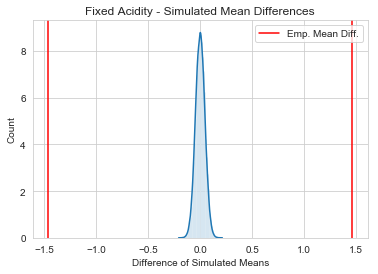


------------------------------
VARIABLE: VOLATILE ACIDITY
Number of Bootstrap Samples: 100,000
Red Wines Empirical Mean: 0.53
White Wines Empirical Mean: 0.28
Empirical Mean Diff (abs val): 0.25
Mean of Combined Data: 0.34
Bootstrap 95% Confidence Interval: -0.01 to 0.01
p-value: 0.00000


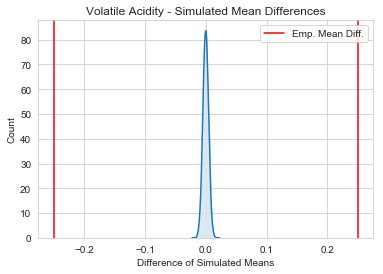


------------------------------
VARIABLE: CITRIC ACID
Number of Bootstrap Samples: 100,000
Red Wines Empirical Mean: 0.27
White Wines Empirical Mean: 0.33
Empirical Mean Diff (abs val): 0.06
Mean of Combined Data: 0.32
Bootstrap 95% Confidence Interval: -0.01 to 0.01
p-value: 0.00000


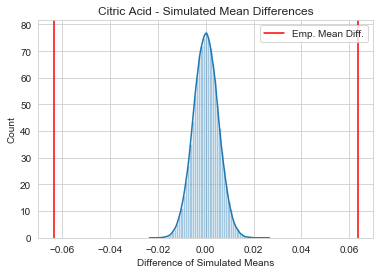


------------------------------
VARIABLE: RESIDUAL SUGAR
Number of Bootstrap Samples: 100,000
Red Wines Empirical Mean: 2.53
White Wines Empirical Mean: 6.38
Empirical Mean Diff (abs val): 3.85
Mean of Combined Data: 5.43
Bootstrap 95% Confidence Interval: -0.16 to 0.16
p-value: 0.00000


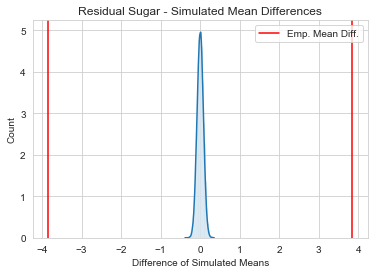


------------------------------
VARIABLE: CHLORIDES
Number of Bootstrap Samples: 100,000
Red Wines Empirical Mean: 0.09
White Wines Empirical Mean: 0.05
Empirical Mean Diff (abs val): 0.04
Mean of Combined Data: 0.06
Bootstrap 95% Confidence Interval: -0.00 to 0.00
p-value: 0.00000


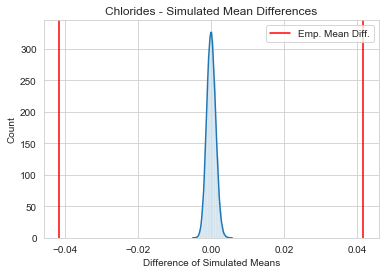


------------------------------
VARIABLE: FREE SULFUR DIOXIDE
Number of Bootstrap Samples: 100,000
Red Wines Empirical Mean: 15.85
White Wines Empirical Mean: 35.26
Empirical Mean Diff (abs val): 19.41
Mean of Combined Data: 30.49
Bootstrap 95% Confidence Interval: -0.69 to 0.69
p-value: 0.00000


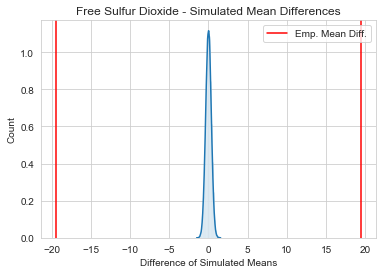


------------------------------
VARIABLE: TOTAL SULFUR DIOXIDE
Number of Bootstrap Samples: 100,000
Red Wines Empirical Mean: 46.17
White Wines Empirical Mean: 138.29
Empirical Mean Diff (abs val): 92.12
Mean of Combined Data: 115.64
Bootstrap 95% Confidence Interval: -1.95 to 1.96
p-value: 0.00000


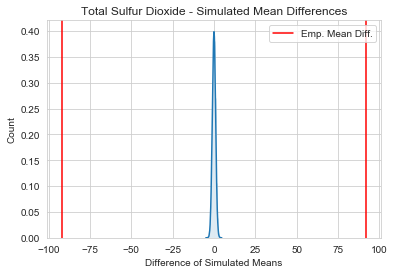


------------------------------
VARIABLE: DENSITY
Number of Bootstrap Samples: 100,000
Red Wines Empirical Mean: 1.00
White Wines Empirical Mean: 0.99
Empirical Mean Diff (abs val): 0.00
Mean of Combined Data: 0.99
Bootstrap 95% Confidence Interval: -0.00 to 0.00
p-value: 0.00000


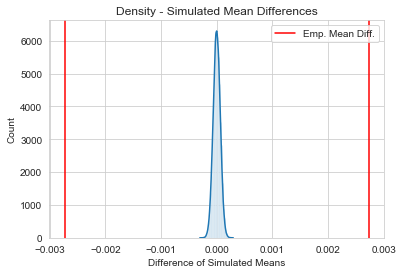


------------------------------
VARIABLE: PH
Number of Bootstrap Samples: 100,000
Red Wines Empirical Mean: 3.31
White Wines Empirical Mean: 3.19
Empirical Mean Diff (abs val): 0.12
Mean of Combined Data: 3.22
Bootstrap 95% Confidence Interval: -0.01 to 0.01
p-value: 0.00000


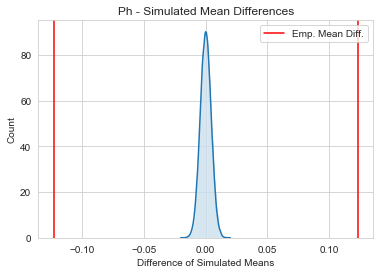


------------------------------
VARIABLE: SULPHATES
Number of Bootstrap Samples: 100,000
Red Wines Empirical Mean: 0.66
White Wines Empirical Mean: 0.49
Empirical Mean Diff (abs val): 0.17
Mean of Combined Data: 0.53
Bootstrap 95% Confidence Interval: -0.01 to 0.01
p-value: 0.00000


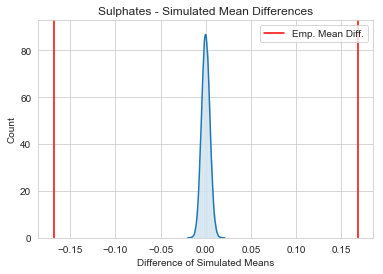


------------------------------
VARIABLE: ALCOHOL
Number of Bootstrap Samples: 100,000
Red Wines Empirical Mean: 10.42
White Wines Empirical Mean: 10.51
Empirical Mean Diff (abs val): 0.09
Mean of Combined Data: 10.49
Bootstrap 95% Confidence Interval: -0.06 to 0.06
p-value: 0.00326


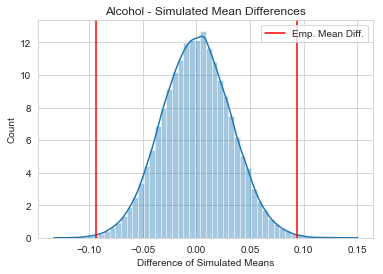


------------------------------


In [42]:
# Perform bootstrap sampling and calculate p-values

size = 100000
confidence_interval = [2.5, 97.5]

for col in red_clean.columns:
    data_r = red_clean[col]
    data_w = white_clean[col]
    empirical_means_diff_bs = abs(diff_of_means(data_r, data_w))
    combo_mean = np.mean(np.concatenate((data_r, data_w)))
    
    # Shift the data to the combined mean
    red_shifted = data_r - np.mean(data_r) + combo_mean
    white_shifted = data_w - np.mean(data_w) + combo_mean

    # Compute the bootstrap replicates from the shifted arrays
    red_bs_reps = gen_bootstrap_reps(red_shifted, np.mean, size)
    white_bs_reps = gen_bootstrap_reps(white_shifted, np.mean, size)
    
    # Take the difference of the means
    bs_reps_diff = red_bs_reps - white_bs_reps
    
    # Compute p-value and confidence intervals
    p_bs = np.sum(abs(bs_reps_diff) >= empirical_means_diff_bs) / len(bs_reps_diff)
    ptiles = np.percentile(bs_reps_diff, confidence_interval)

    # Format and print results
    print('-' * 30)
    print('VARIABLE: {}'.format(col.upper()))
    print('Number of Bootstrap Samples: {0:,}'.format(size))
    print('Red Wines Empirical Mean: {0:.2f}'.format(np.mean(data_r)))
    print('White Wines Empirical Mean: {0:.2f}'.format(np.mean(data_w)))
    print('Empirical Mean Diff (abs val): {0:.2f}'.format(empirical_means_diff_bs))
    print('Mean of Combined Data: {0:.2f}'.format(combo_mean))
    print('Bootstrap {0:.0f}% Confidence Interval: {1:.2f} to {2:.2f}'
          .format(confidence_interval[1] - confidence_interval[0], ptiles[0], ptiles[1]))
    print('p-value: {0:.5f}'.format(p_bs))

    # Plot results
    plt.figure()
    sns.distplot(bs_reps_diff);
    plt.xlabel('Difference of Simulated Means');
    plt.ylabel('Count');
    plt.axvline(x=empirical_means_diff_bs, color='red', label='Emp. Mean Diff.')
    plt.axvline(x=-empirical_means_diff_bs, color='red')
    plt.title(col.title() + ' - Simulated Mean Differences');
    plt.legend();
    plt.show()
    print()

print('-' * 30)

#### Conclusions

Again, every $p$-value except for `alcohol` registered as zero calculating 100,000 bootstrap replicates. The actual $p$-values are likely extremely small and well below the $\alpha$ threshold of 0.05 to reject the null hypothesis. These outcomes and the `alcohol` $p$-value of ~$0.003$ provides strong evidence to reject the null hypothesis that red and white wine physiochemical properties have different distributions but the same means, and that the differences between the means are statistically significant.

### 3) What About Independent t-Tests?

**Independent t-tests** (or **independent samples t-tests**) are another common method for hypothesis testing.

There are six assumptions underlying an independent t-test that the study design and underlying data must meet for the test to give valid results. The way certain variables are distributed in the Wine Quality dataset, an independent t-test is not appropriate for the hypothesis test of all physiochemical variables, however, this test could work on select variables that meet all criteria below.

- The dependent variable is measured on a continuous scale. YES - all physiochemical property (the dependent variables for this study) are continuous
- The independent variable (type of wine, either red or white) consists of two categorical, independent groups. YES - the type of wine (the independent variable) is either red or white
- There's an independence of observations (there's no relationship between the wines in either group or the groups themselves). YES - each observation is a chemical test run on a single wine and unrelated to the other tests
- There should be no significant outliers in the data. NO - while a few "extreme" outliers were removed, the box plots showed several variables that still have numerous outliers (`free sulfur dioxide`, `total sulfur dioxide`, `fixed acidity`, and `residual sugar`)
- The dependent variable should be approximately normally distributed for each category of independent variable. NO - several variables (`volatile acidity`, `citric acid`, `alcohol`, and `density`) were not normally distributed (these are exclusive of ones already eliminated for outliers)
- There's a homogeneity of variances (the (population) variance for each category of independent variable is the same). UNLIKELY - statistical tests weren't run to confirm this, but several distribution plots would indicate that this assumption is not met, and those variables were already eliminated for other reasons. Note that if there were variables where this were the only issue, we would perform a **Welch's t-test** instead.

After removing the noted variables above, there are three left that meet all criteria: `chlorides`, `pH`, and `sulphates`. Let's see what an independent t-test shows for these variables.

- **Null Hypothesis ($H_0$)**: $\mu_{\text{red}} = \mu_{\text{white}}$
- **Alternative Hypothesis ($H_a$)**: $\mu_{\text{red}} \ne \mu_{\text{white}}$
- **$\alpha$**: 0.05
- **Test Statistic**: mean
- **Degrees of Freedom**: $\gt 1000$ for both red and white wine sets

In [166]:
from scipy import stats

t_cols = ['chlorides', 'pH', 'sulphates']
for col in t_cols:
    data_r = red_clean[col]
    data_w = white_clean[col]
    t_stat, p_val = stats.ttest_ind(data_r, data_w)
    
    print('-' * 30)
    print('VARIABLE: {}'.format(col.upper()))
    print('t-statistic: {0:.2f}'.format(t_stat))
    print('p-value: {}'.format(p_val))

print('-' * 30)

------------------------------
VARIABLE: CHLORIDES
t-statistic: 48.1590
p-value: 0.0
------------------------------
VARIABLE: PH
t-statistic: 28.2009
p-value: 3.6998706658997193e-165
------------------------------
VARIABLE: SULPHATES
t-statistic: 45.0166
p-value: 0.0
------------------------------


#### Conclusions

The results are similar to the permutation and bootstrap tests and also confirm that there is statistically significant evidence to reject the null hypothesis that the `chlorides`, `pH`, and `sulphates` properties for red and white wine have the same means.